In [198]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [199]:
#Read raw file
df=pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

df.head()


,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [200]:
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


# Part 1 : Data Cleaning

In [201]:
# check missing value
missing_values = df.isnull().sum()
print("Missing values before cleaning:\n", missing_values)

Missing values before cleaning:
 User_ID                      0
Age                          0
Gender                       0
Location                     0
Subscription_Start_Date      0
Subscription_Type            0
Monthly_Payment              0
Payment_Method               0
Monthly_Hours_Watched        0
Favorite_Genre               0
Devices_Used                 0
Average_Session_Length       0
Content_ID                   0
Rating_Given                 0
Churned                      0
Date_of_Churn              754
Reason_for_Churn           754
dtype: int64


In [202]:
# Check missing value for Churned
churned_data = df[df['Churned'] == 1]
missing_values_churned = churned_data[['Date_of_Churn', 'Reason_for_Churn']].isnull().sum()
print("Missing values when Churned=1:\n", missing_values_churned)

Missing values when Churned=1:
 Date_of_Churn       0
Reason_for_Churn    0
dtype: int64


There is no missing value found in this data


In [203]:
#Convert subscription start date to datetime format
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])

# Define the current date
current_date = datetime.now()

# Create columns and clean the 
df['Subscription_Months'] = ((current_date - df['Subscription_Start_Date']) / pd.Timedelta(days=30)).astype(int)
df.loc[df['Subscription_Months'] == 0, 'Subscription_Months'] = 1

df['Total_Hours_Watched'] = df['Monthly_Hours_Watched'] * df['Subscription_Months']
df['Total_Visits'] = df['Total_Hours_Watched'] / df ['Average_Session_Length']
df['Average_Monthly_Visits'] = df['Total_Visits'] / df['Subscription_Months']
# Create a column called Age_range for futher analyse
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-30', '30-40', '40-50', '50-60', '60-70']
df['Age_range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.describe()

,User_ID,Age,Subscription_Start_Date,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned,Subscription_Months,Total_Hours_Watched,Total_Visits,Average_Monthly_Visits
count,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,500.500000,44.385000,2021-09-18 17:08:01.662466560,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000,32.294000,603.404896,7.818686e+03,230.618123
min,1.000000,18.000000,2019-05-10 01:53:37.659073,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000,1.000000,0.437665,1.752474e-01,0.006491
25%,250.750000,31.750000,2020-05-15 19:53:37.664891136,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000,16.000000,104.604898,7.370814e+01,3.447151
50%,500.500000,45.000000,2021-08-21 01:53:37.662536448,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000,33.000000,341.815852,2.617428e+02,9.923136
75%,750.250000,57.000000,2023-01-09 07:53:37.664328192,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000,49.000000,816.388399,9.609172e+02,30.822053
max,1000.000000,70.000000,2024-05-06 01:53:37.662112,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000,61.000000,6718.592656,5.379438e+06,125103.212681
std,288.819436,15.321669,NaN,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894,17.905982,770.238464,1.709157e+05,4071.770895


There is extreme values in Average_Monthly_Visits. The following step is to fix this problem.

In [204]:
# Find records where Average_Monthly_Visits exceeds 1000
threshold = 1000  
high_visits_records = df[df['Average_Monthly_Visits'] > threshold]
high_visits_records


,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,...,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Months,Total_Hours_Watched,Total_Visits,Average_Monthly_Visits,Age_range
82,83,53,Other,West,2024-05-06 01:53:37.657910,Standard,14.99,Direct Debit,44.188567,Sci-Fi,...,1033,5,0,NaN,NaN,1,44.188567,4.119496e+03,4119.496371,50-60
92,93,33,Female,West,2023-02-17 01:53:37.658015,Basic,9.99,Credit Card,41.212535,Comedy,...,1085,4,0,NaN,NaN,15,618.188022,3.913460e+05,26089.730797,30-40
155,156,32,Female,North,2023-04-16 01:53:37.658696,Premium,19.99,Credit Card,10.835703,Drama,...,1077,1,0,NaN,NaN,13,140.864138,9.821576e+04,7555.058304,30-40
222,223,66,Male,North,2020-04-30 01:53:37.659420,Basic,9.99,Credit Card,32.707103,Sci-Fi,...,1004,4,1,2020-06-04 01:53:37.659420,Price increase,49,1602.648035,8.669066e+04,1769.197143,60-70
229,230,54,Female,East,2024-01-02 01:53:37.659500,Standard,14.99,Credit Card,36.208524,Drama,...,1051,5,0,NaN,NaN,4,144.834095,8.532288e+03,2133.072006,50-60
274,275,37,Male,East,2021-06-13 01:53:37.659979,Standard,14.99,Credit Card,40.583644,Action,...,1026,5,1,2021-12-10 01:53:37.659979,Found better service,36,1461.011181,3.108226e+05,8633.959958,30-40
485,486,30,Male,Central,2020-10-31 01:53:37.662348,Basic,9.99,Direct Debit,60.791141,Drama,...,1079,5,0,NaN,NaN,43,2614.019058,5.379438e+06,125103.212681,30-40
505,506,49,Male,West,2023-04-28 01:53:37.662531,Premium,19.99,Direct Debit,55.496554,Comedy,...,1052,2,0,NaN,NaN,13,721.455204,1.606589e+04,1235.837974,40-50
540,541,56,Other,West,2021-05-26 01:53:37.662906,Standard,14.99,Direct Debit,14.425441,Comedy,...,1043,5,0,NaN,NaN,36,519.315879,3.812154e+04,1058.931625,50-60
572,573,50,Other,West,2020-04-03 01:53:37.663267,Standard,14.99,Direct Debit,43.966698,Action,...,1072,4,0,NaN,NaN,50,2198.334905,6.884929e+04,1376.985808,50-60


In [205]:
# Check the detailed data of high value users
extreme_values_users = high_visits_records[['User_ID', 'Monthly_Hours_Watched', 'Average_Session_Length', 'Total_Hours_Watched', 'Total_Visits', 'Average_Monthly_Visits']]
extreme_values_users

,User_ID,Monthly_Hours_Watched,Average_Session_Length,Total_Hours_Watched,Total_Visits,Average_Monthly_Visits
82,83,44.188567,0.010727,44.188567,4.119496e+03,4119.496371
92,93,41.212535,0.001580,618.188022,3.913460e+05,26089.730797
155,156,10.835703,0.001434,140.864138,9.821576e+04,7555.058304
222,223,32.707103,0.018487,1602.648035,8.669066e+04,1769.197143
229,230,36.208524,0.016975,144.834095,8.532288e+03,2133.072006
274,275,40.583644,0.004700,1461.011181,3.108226e+05,8633.959958
485,486,60.791141,0.000486,2614.019058,5.379438e+06,125103.212681
505,506,55.496554,0.044906,721.455204,1.606589e+04,1235.837974
540,541,14.425441,0.013623,519.315879,3.812154e+04,1058.931625
572,573,43.966698,0.031930,2198.334905,6.884929e+04,1376.985808


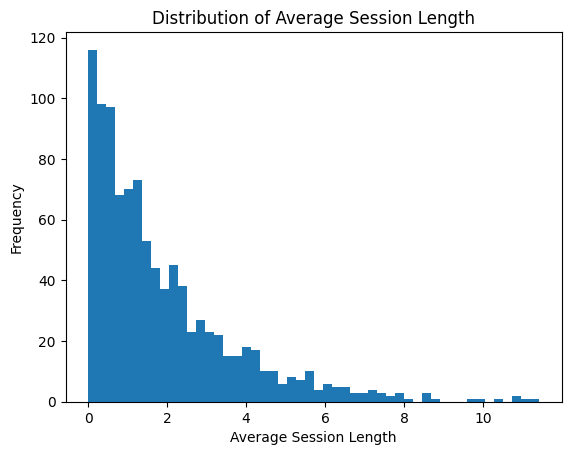

In [206]:
# check Average_Session_Length distrbution
plt.hist(df['Average_Session_Length'], bins=50)
plt.xlabel('Average Session Length')
plt.ylabel('Frequency')
plt.title('Distribution of Average Session Length')
plt.show()


In [207]:
# Create df_clean
df_clean = df.copy()

# Replace extreme values ​​with the 10th and 99th percentiles
lower_bound = df_clean['Average_Session_Length'].quantile(0.10)
upper_bound = df_clean['Average_Session_Length'].quantile(0.99)

df_clean.loc[df_clean['Average_Session_Length'] < lower_bound, 'Average_Session_Length'] = lower_bound
df_clean.loc[df_clean['Average_Session_Length'] > upper_bound, 'Average_Session_Length'] = upper_bound

df_clean['Total_Visits'] = df_clean['Total_Hours_Watched'] / df_clean['Average_Session_Length']
df_clean['Average_Monthly_Visits'] = df_clean['Total_Visits'] / df_clean['Subscription_Months']

# Drop unnecessary columns
df_clean = df_clean.drop(columns=['Subscription_Start_Date', 'Date_of_Churn','Payment_Method', 'Content_ID','Total_Visits'])

df_clean.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Rating_Given,Churned,Subscription_Months,Total_Hours_Watched,Average_Monthly_Visits
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.889173,3.030000,0.246000,32.294000,603.404896,27.280467
std,288.819436,15.321669,3.404922,19.279140,1.793020,1.422365,0.430894,17.905982,770.238464,48.246150
min,1.000000,18.000000,9.990000,0.041574,0.201294,1.000000,0.000000,1.000000,0.437665,0.006491
25%,250.750000,31.750000,9.990000,5.490739,0.548918,2.000000,0.000000,16.000000,104.604898,3.378089
50%,500.500000,45.000000,14.990000,13.361219,1.271808,3.000000,0.000000,33.000000,341.815852,9.735917
75%,750.250000,57.000000,14.990000,26.471636,2.623575,4.000000,0.000000,49.000000,816.388399,29.574823
max,1000.000000,70.000000,19.990000,139.170408,8.471012,5.000000,1.000000,61.000000,6718.592656,496.832333


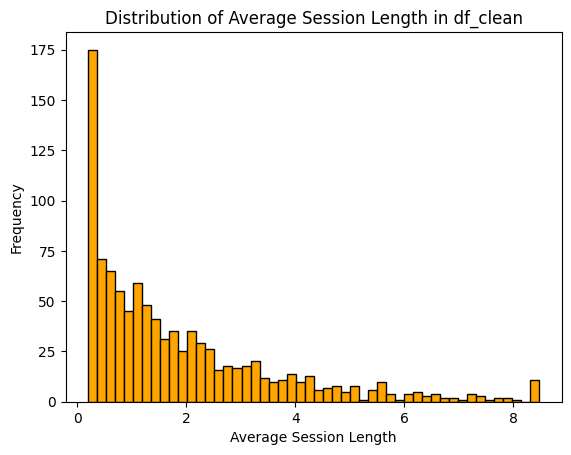

In [208]:
# Distribution of Average Session Length in df_clea
plt.hist(df_clean['Average_Session_Length'], bins=50, edgecolor='black',color="orange")
plt.xlabel('Average Session Length')
plt.ylabel('Frequency')
plt.title('Distribution of Average Session Length in df_clean')
plt.show()

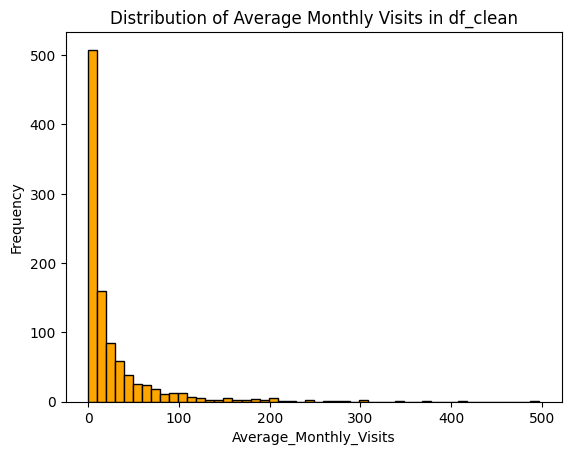

In [209]:
plt.hist(df_clean['Average_Monthly_Visits'], bins=50, edgecolor='black',color="orange")
plt.xlabel('Average_Monthly_Visits')
plt.ylabel('Frequency')
plt.title('Distribution of Average Monthly Visits in df_clean')
plt.show()

### The data cleaning part is over.

We now have two data sets, one is df: a few columns are added based on the original data.

The other is df_clean ,the following screening is done based on df :

1. Extract the data with Subscription_Months being 0 and change it to 1

2. Fix extreme values ​​in Average_Monthly_Visits

3. Drop unnecessary columns

# Part 2: Exploratory Data Analysis (EDA)

### Descriptive Statistics:

In [210]:
# Calculate summary statistics for numerical columns in df_clean
summary_statistics = df_clean.describe().loc[['mean', '25%','50%', '75%','std']]

# Rename '50%' to 'median' for better clarity
summary_statistics.rename(index={'50%': 'median'}, inplace=True)

summary_statistics


,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Rating_Given,Churned,Subscription_Months,Total_Hours_Watched,Average_Monthly_Visits
mean,500.500000,44.385000,14.580000,19.071653,1.889173,3.030000,0.246000,32.294000,603.404896,27.280467
25%,250.750000,31.750000,9.990000,5.490739,0.548918,2.000000,0.000000,16.000000,104.604898,3.378089
median,500.500000,45.000000,14.990000,13.361219,1.271808,3.000000,0.000000,33.000000,341.815852,9.735917
75%,750.250000,57.000000,14.990000,26.471636,2.623575,4.000000,0.000000,49.000000,816.388399,29.574823
std,288.819436,15.321669,3.404922,19.279140,1.793020,1.422365,0.430894,17.905982,770.238464,48.246150


In [211]:
print(df_clean.describe())

           User_ID          Age  Monthly_Payment  Monthly_Hours_Watched  \
count  1000.000000  1000.000000      1000.000000            1000.000000   
mean    500.500000    44.385000        14.580000              19.071653   
std     288.819436    15.321669         3.404922              19.279140   
min       1.000000    18.000000         9.990000               0.041574   
25%     250.750000    31.750000         9.990000               5.490739   
50%     500.500000    45.000000        14.990000              13.361219   
75%     750.250000    57.000000        14.990000              26.471636   
max    1000.000000    70.000000        19.990000             139.170408   

       Average_Session_Length  Rating_Given      Churned  Subscription_Months  \
count             1000.000000   1000.000000  1000.000000          1000.000000   
mean                 1.889173      3.030000     0.246000            32.294000   
std                  1.793020      1.422365     0.430894            17.905982   


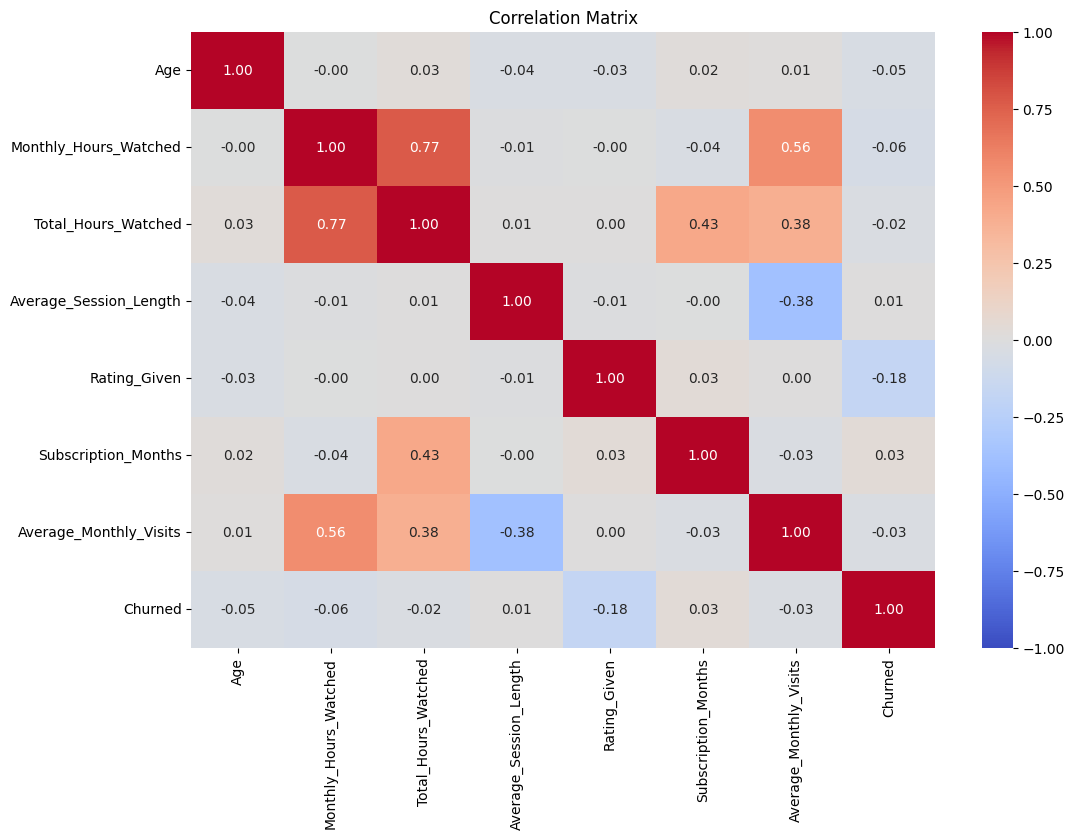

In [212]:
# Correlation matrix
numerical_columns = ['Age', 'Monthly_Hours_Watched','Total_Hours_Watched', 'Average_Session_Length', 'Rating_Given', 'Subscription_Months','Average_Monthly_Visits']

numerical_columns_all = numerical_columns + ['Churned']
correlation_matrix = df_clean[numerical_columns_all].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Visualizations：

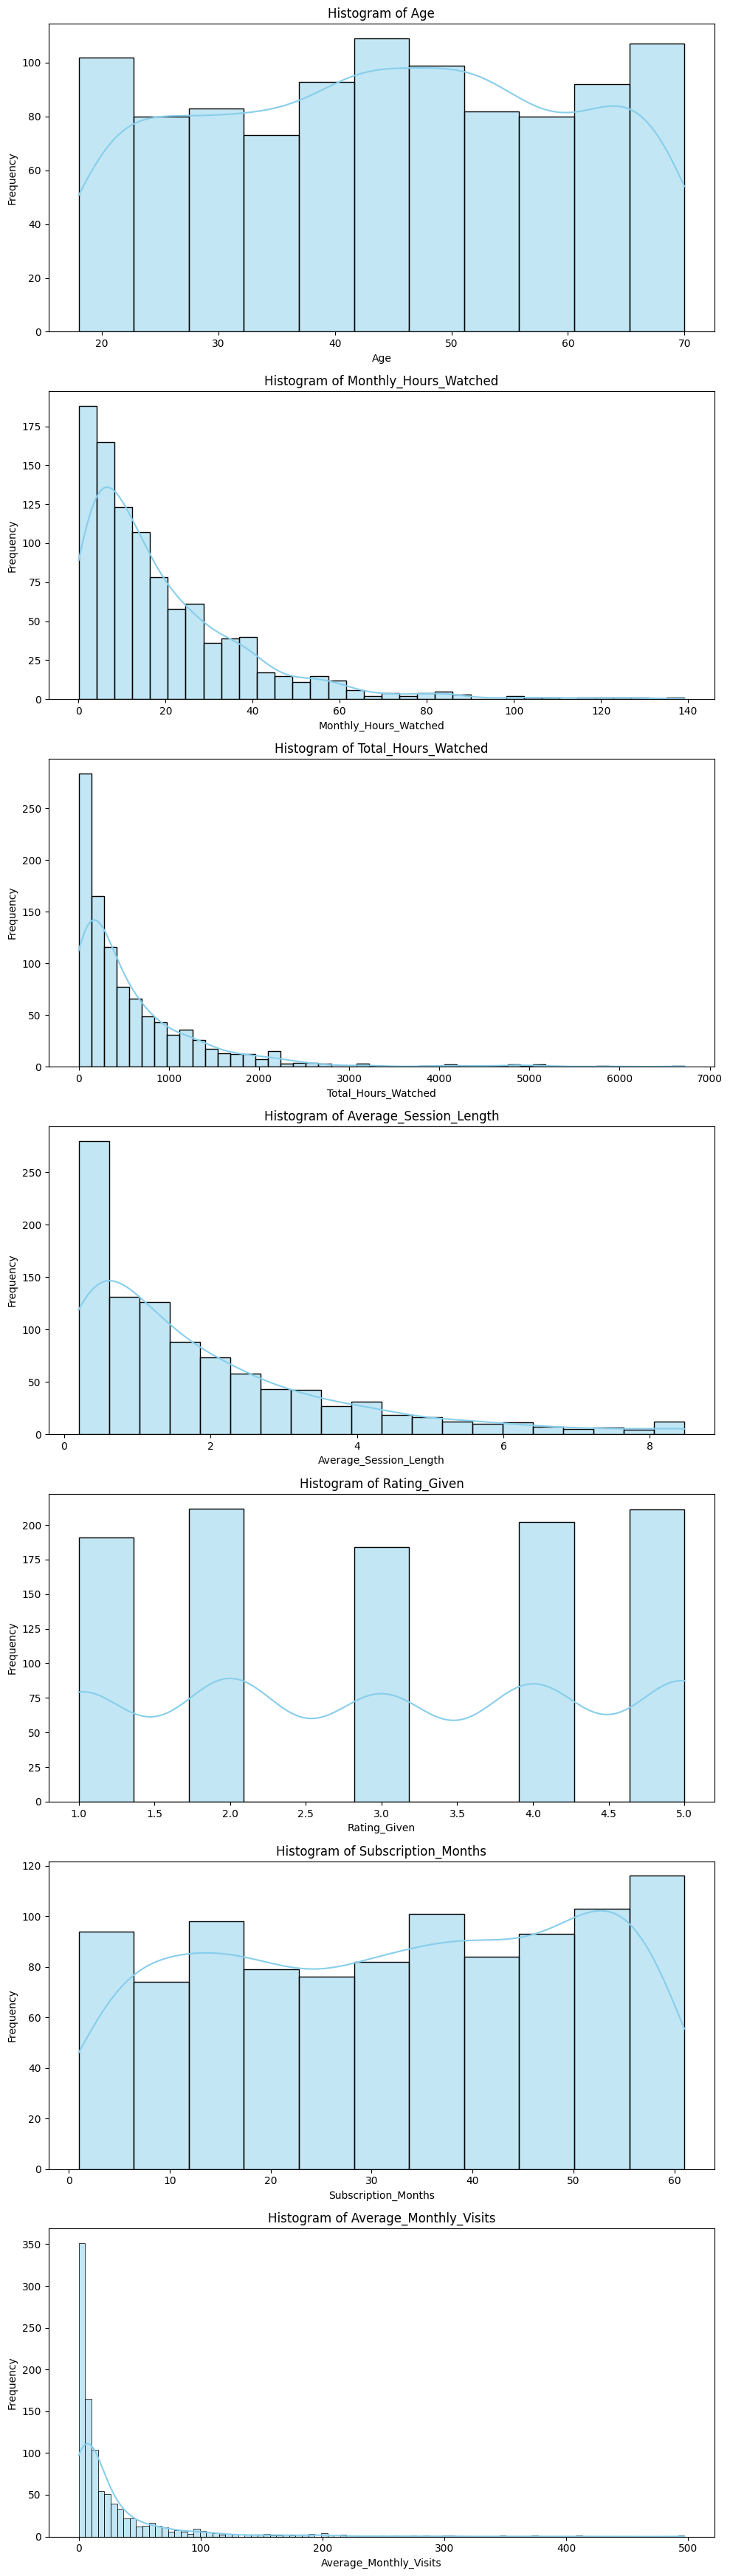

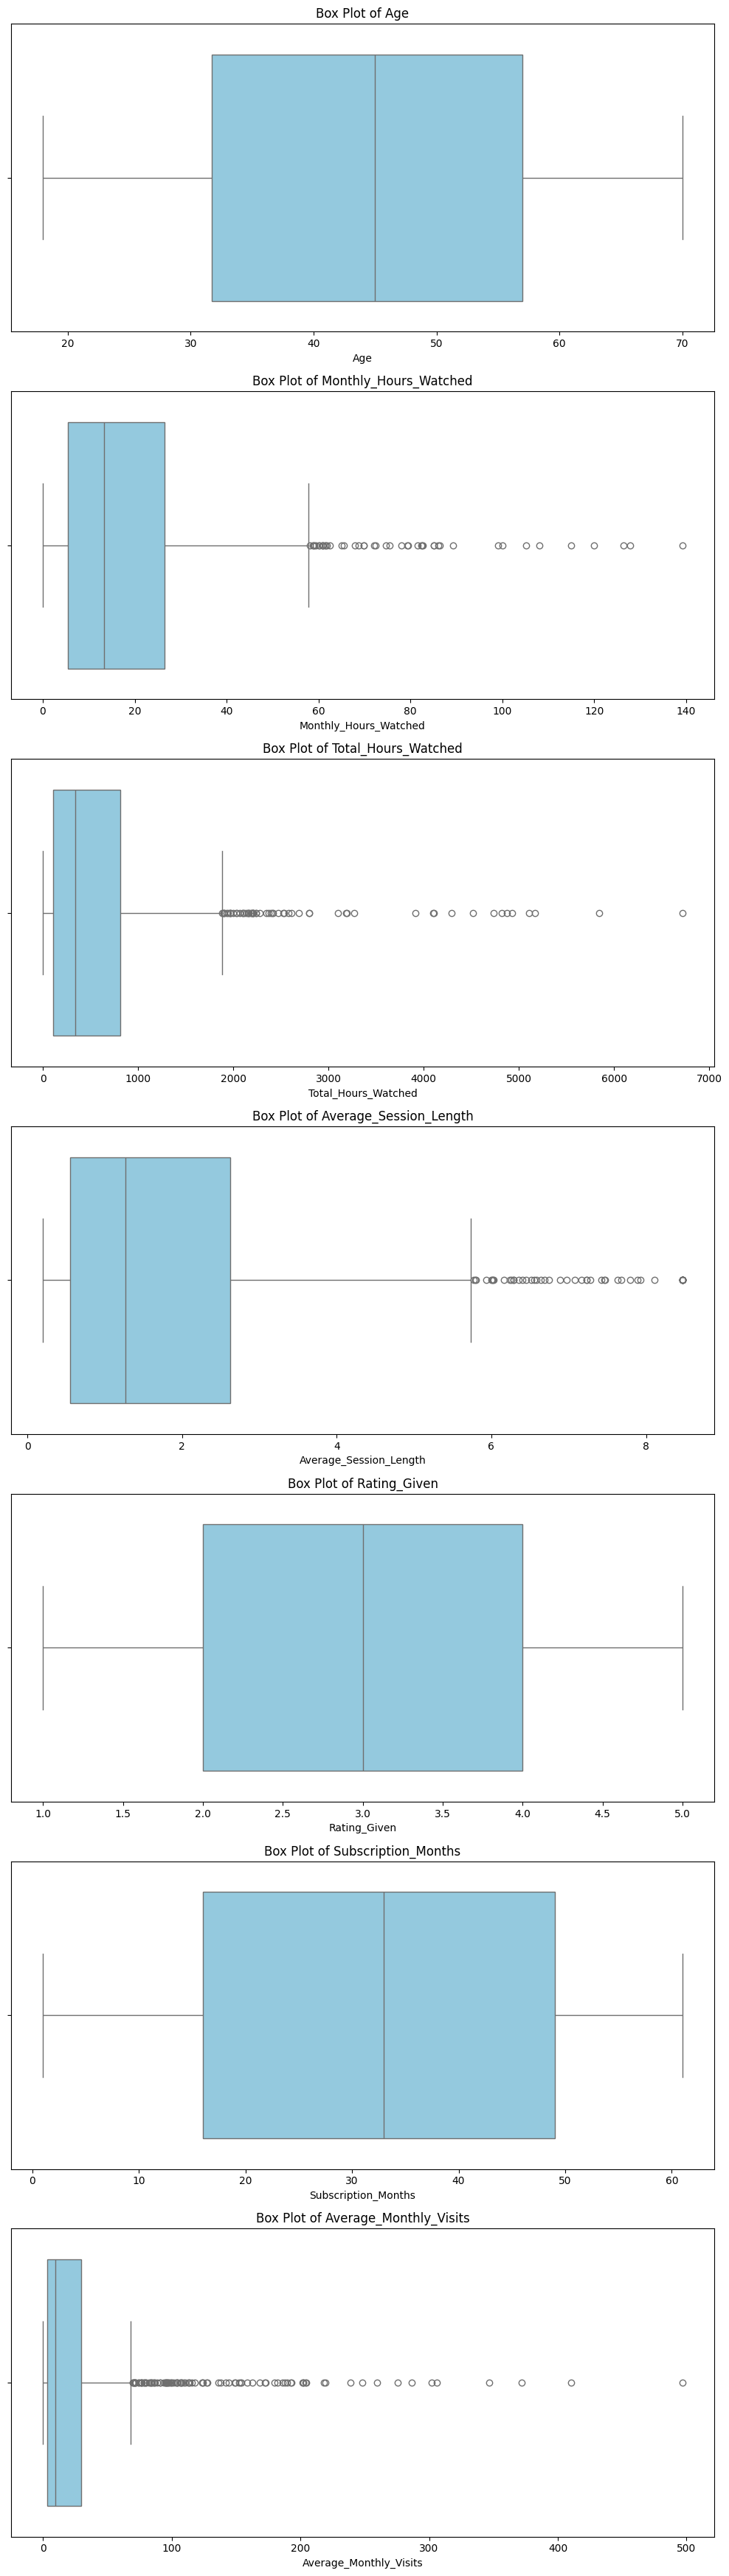

In [213]:
# Visualizations for numerical
numerical_columns = ['Age', 'Monthly_Hours_Watched','Total_Hours_Watched', 'Average_Session_Length', 'Rating_Given', 'Subscription_Months','Average_Monthly_Visits']

# histogram
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 5 * len(numerical_columns)))
for ax, column in zip(axes, numerical_columns):
    sns.histplot(df_clean[column], kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# boxplot
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 5 * len(numerical_columns)))
for ax, column in zip(axes, numerical_columns):
    sns.boxplot(x=df_clean[column], ax=ax, color='skyblue')
    ax.set_title(f'Box Plot of {column}')
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()


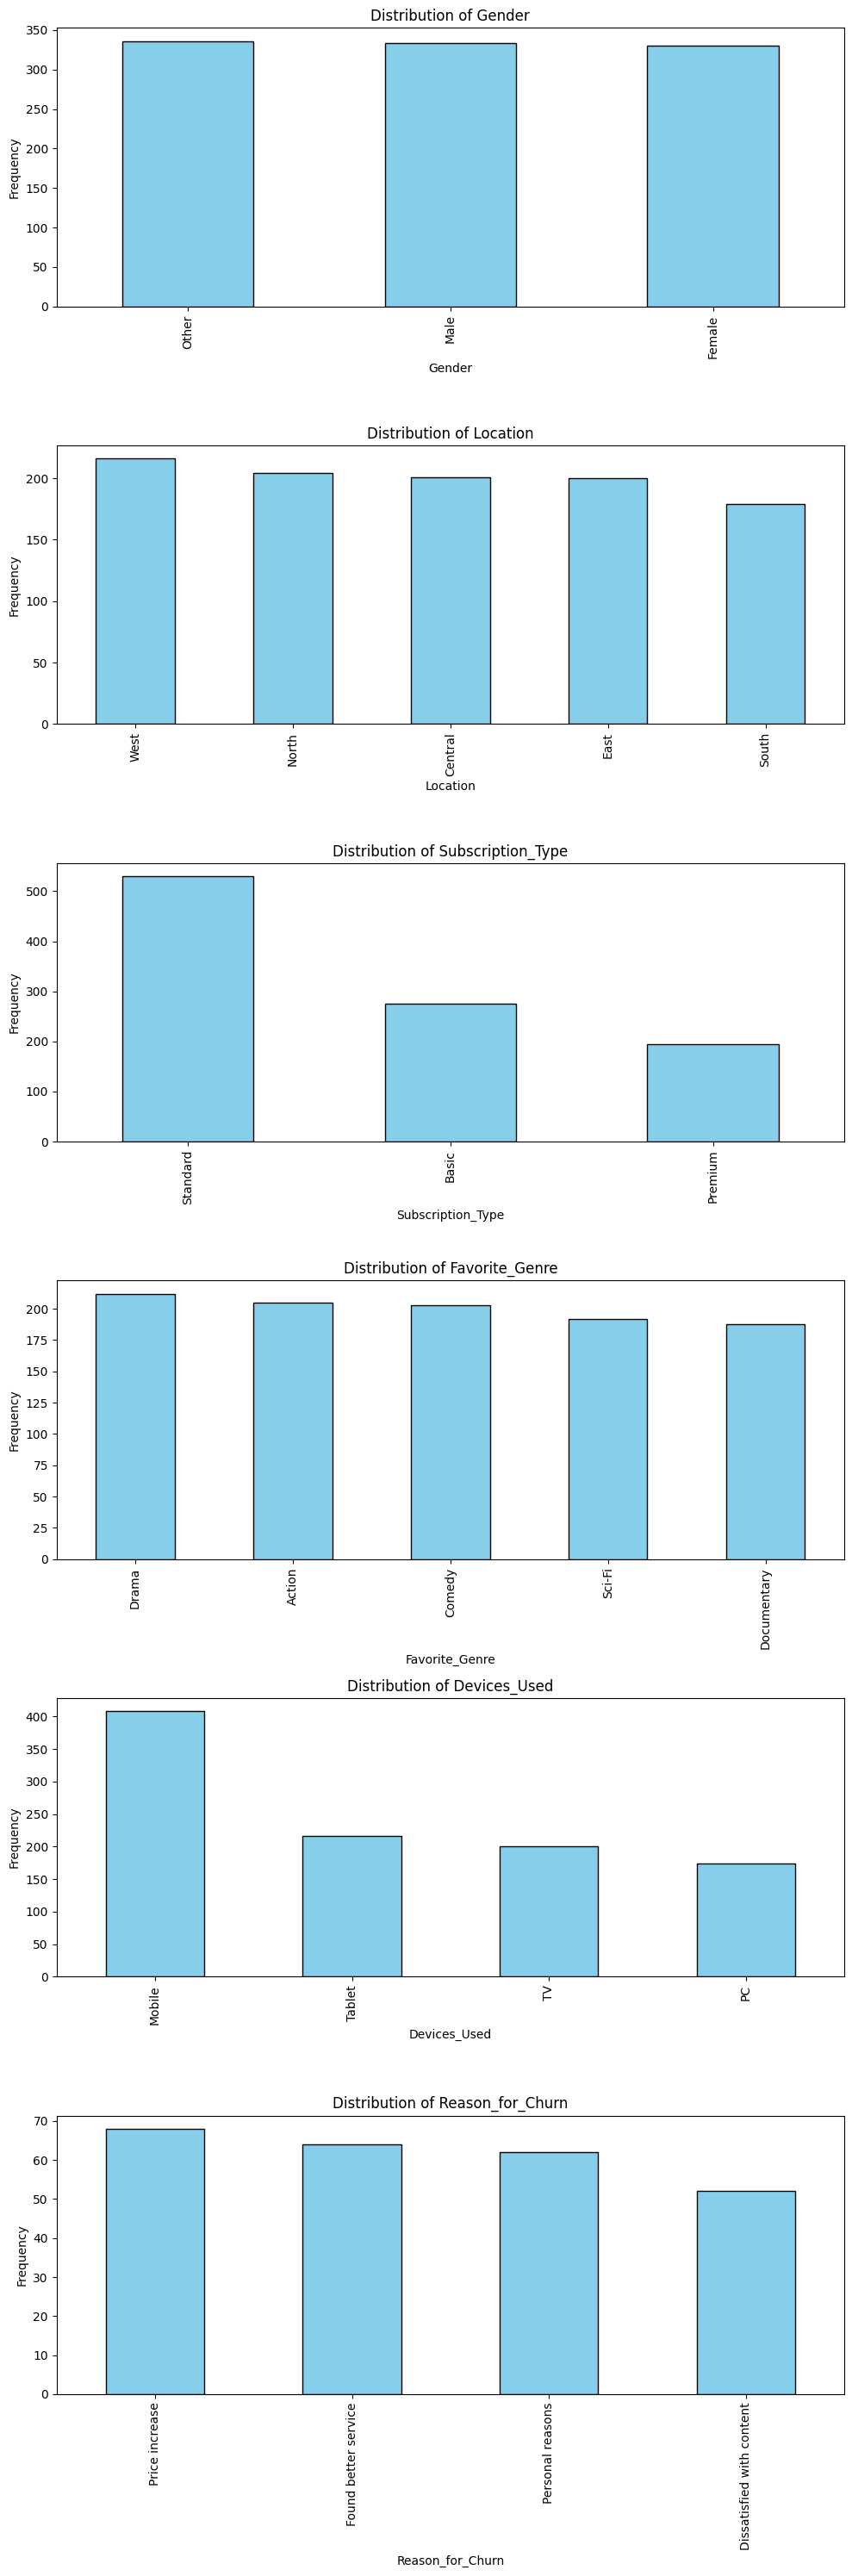

In [214]:
# Visualizations for categorical
categorical_columns = df_clean.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 5 * len(categorical_columns)))

for ax, column in zip(axes, categorical_columns):
    df_clean[column].value_counts().plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Churn Analysis:

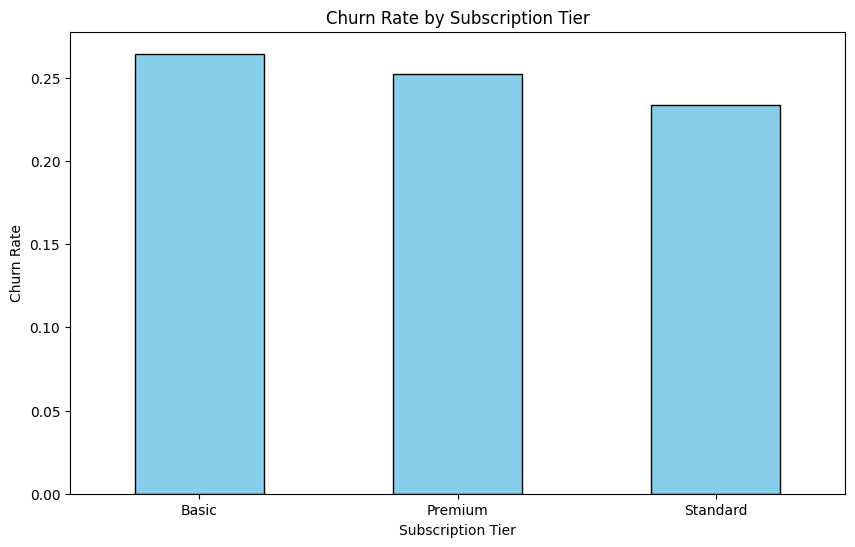

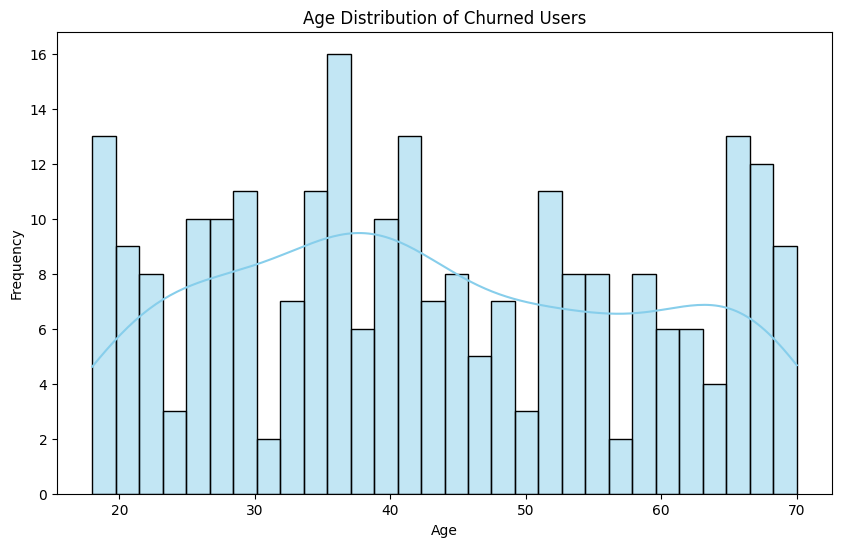

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_84246/226728124.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location', data=df_clean[df_clean['Churned'] == 1], palette='viridis')


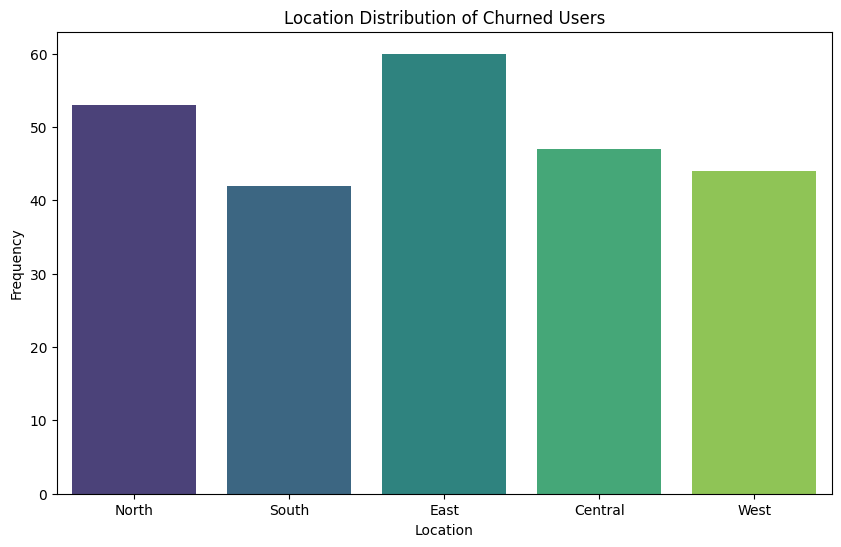

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_84246/226728124.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df_clean[df_clean['Churned'] == 1], palette='viridis')


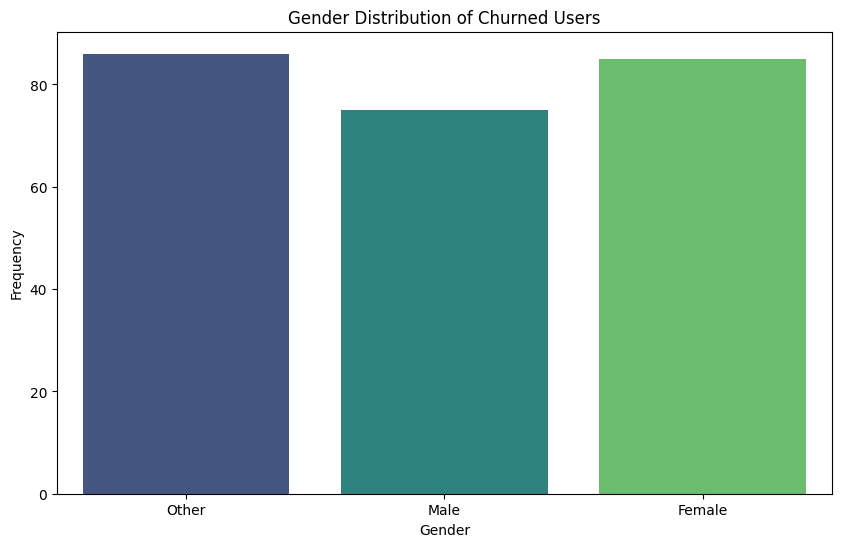

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_84246/226728124.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Favorite_Genre', data=df_clean[df_clean['Churned'] == 1], palette='viridis')


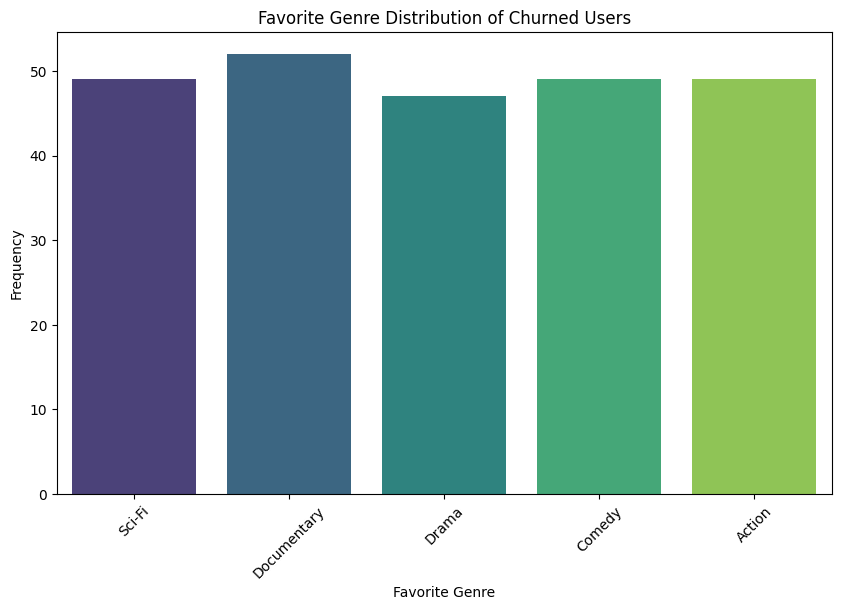

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_84246/226728124.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Devices_Used', data=df_clean[df_clean['Churned'] == 1], palette='viridis')


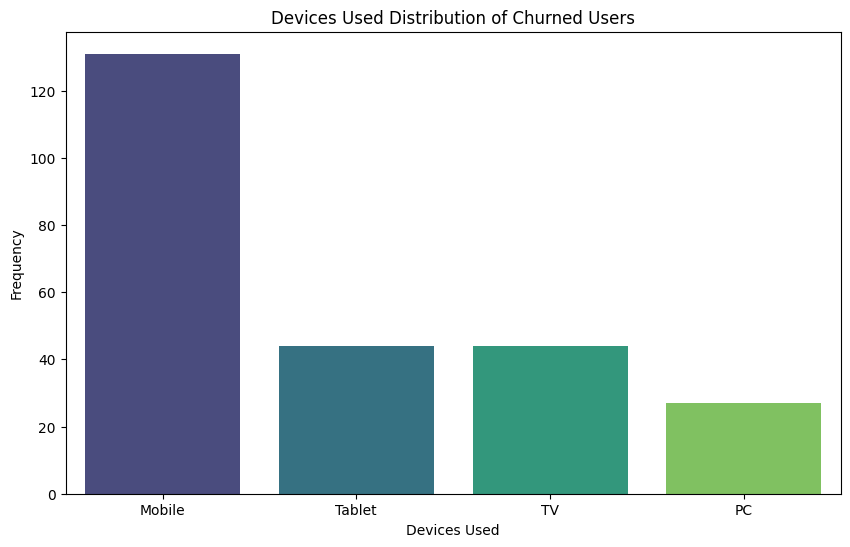

In [215]:
# Comparing Churn Rates Between Subscription Tiers
churn_rate_by_tier = df_clean.groupby('Subscription_Type')['Churned'].mean()

plt.figure(figsize=(10, 6))
churn_rate_by_tier.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Churn Rate by Subscription Tier')
plt.xlabel('Subscription Tier')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

# Distribution
# Age
plt.figure(figsize=(10, 6))
sns.histplot(df_clean[df_clean['Churned'] == 1]['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Churned Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# location
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', data=df_clean[df_clean['Churned'] == 1], palette='viridis')
plt.title('Location Distribution of Churned Users')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

# gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df_clean[df_clean['Churned'] == 1], palette='viridis')
plt.title('Gender Distribution of Churned Users')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

# favourite genre
plt.figure(figsize=(10, 6))
sns.countplot(x='Favorite_Genre', data=df_clean[df_clean['Churned'] == 1], palette='viridis')
plt.title('Favorite Genre Distribution of Churned Users')
plt.xlabel('Favorite Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Device
plt.figure(figsize=(10, 6))
sns.countplot(x='Devices_Used', data=df_clean[df_clean['Churned'] == 1], palette='viridis')
plt.title('Devices Used Distribution of Churned Users')
plt.xlabel('Devices Used')
plt.ylabel('Frequency')
plt.show()

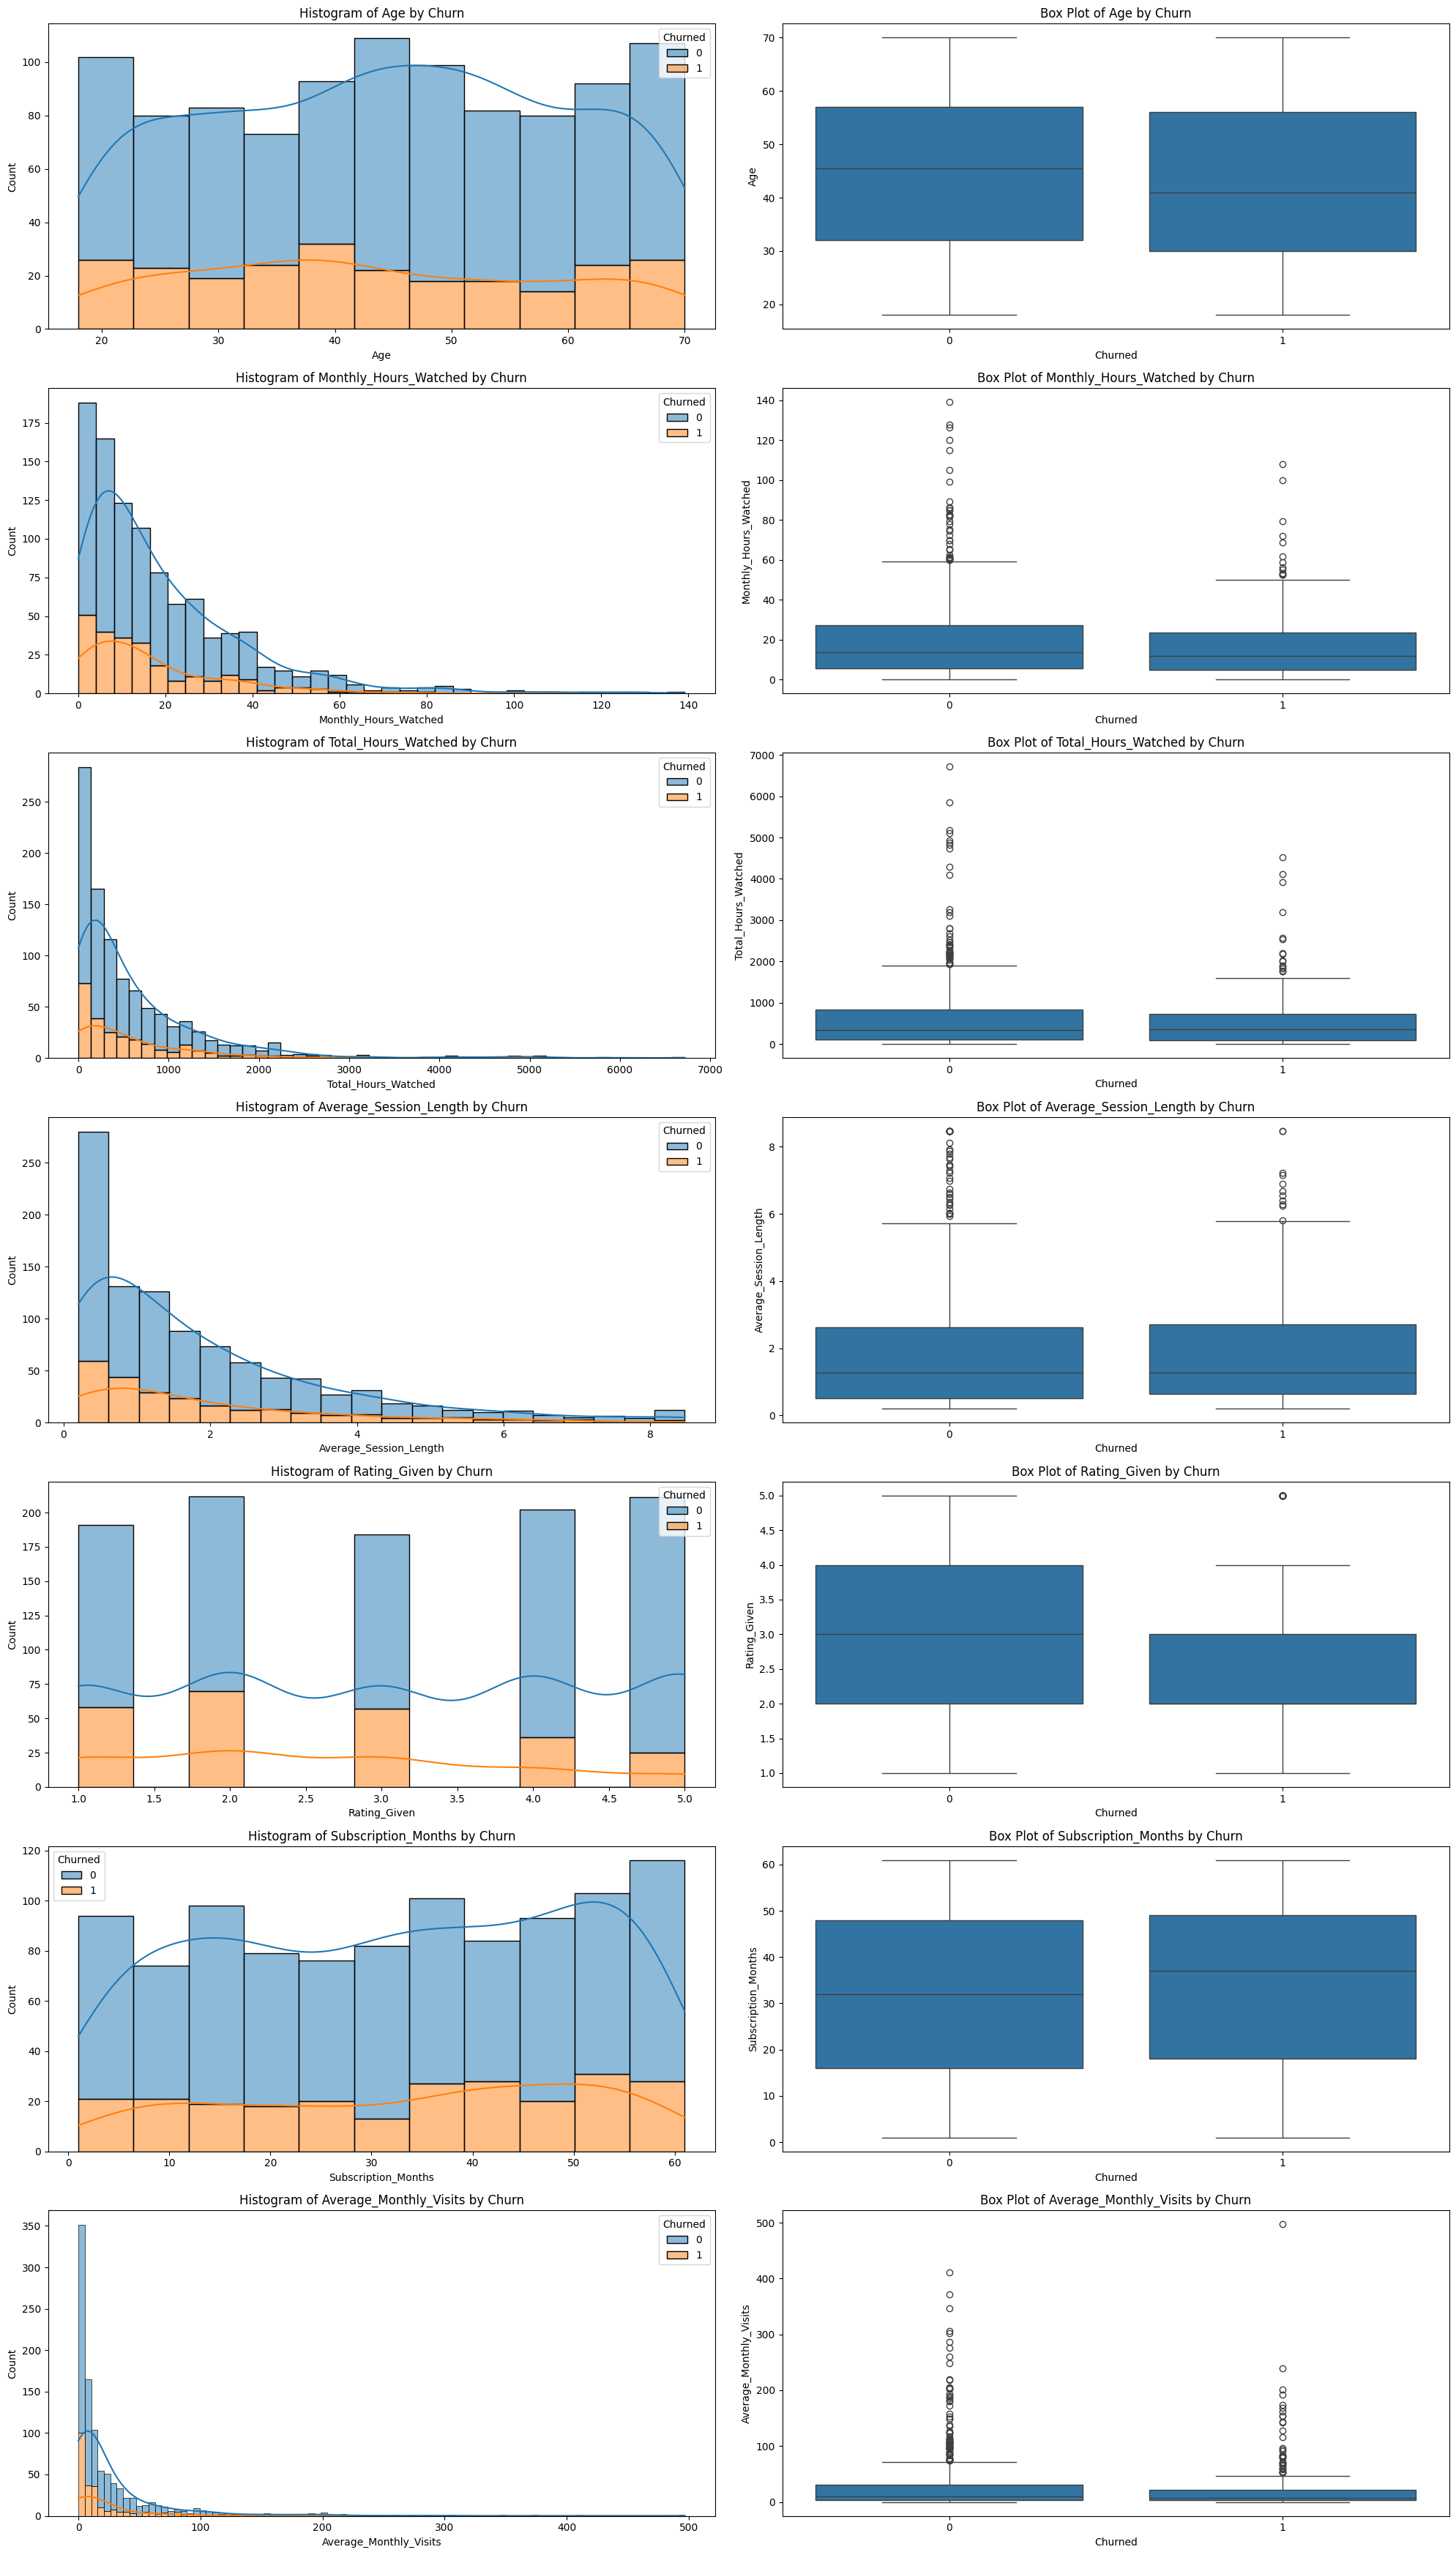

In [216]:
# numerical & churned
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(20, 5 * len(numerical_columns)))
for i, column in enumerate(numerical_columns):
    sns.histplot(data=df_clean, x=column, hue='Churned', multiple='stack', kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {column} by Churn')
    sns.boxplot(data=df_clean, x='Churned', y=column, ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {column} by Churn')

plt.tight_layout()
plt.show()

# Part 3: Key Metrics Identification

### Churn Rate:

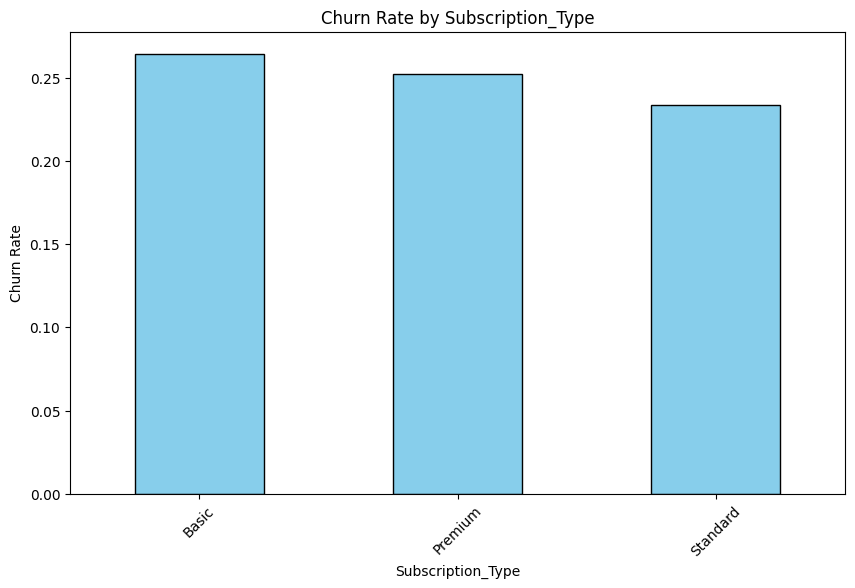

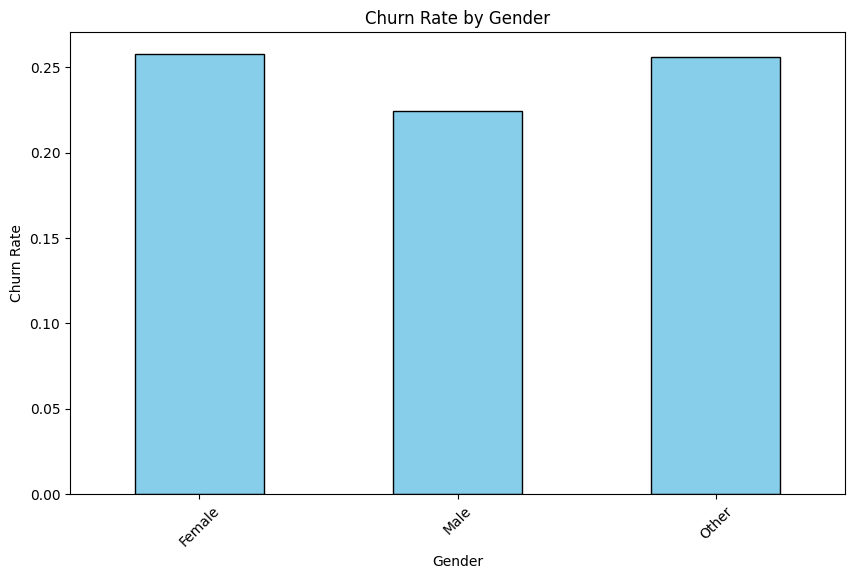

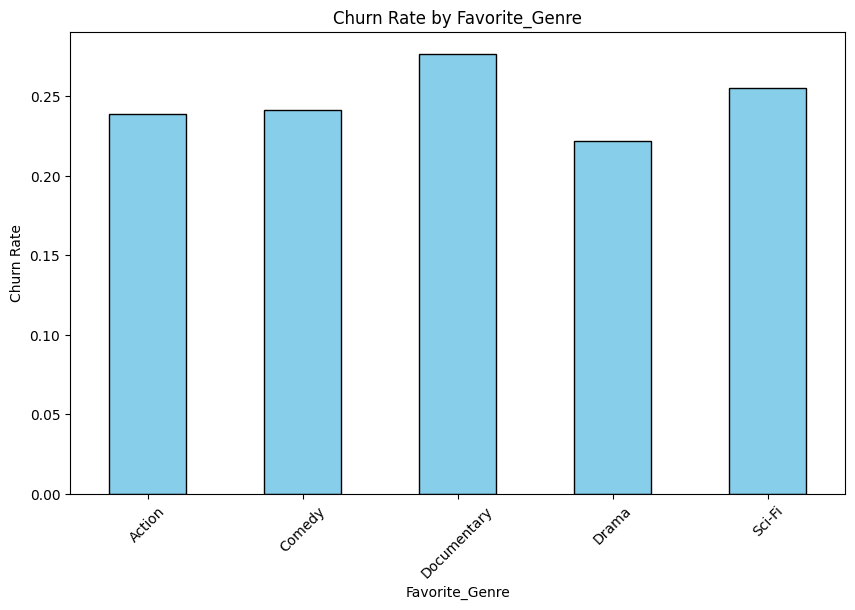

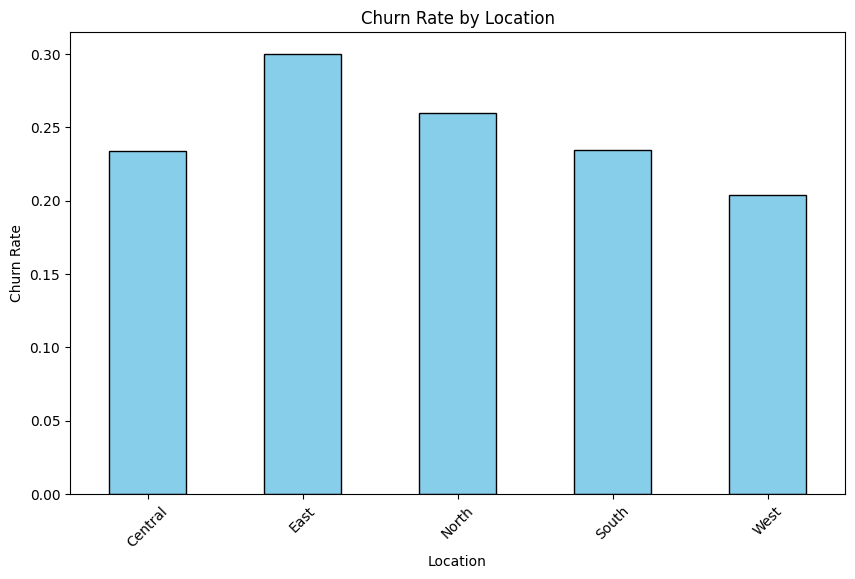

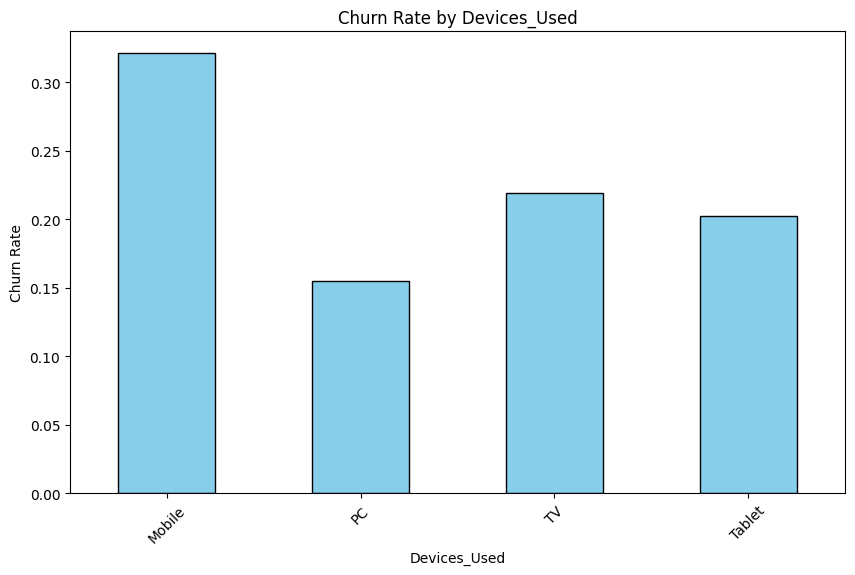

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_84246/1728822789.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df_clean.groupby(column)['Churned'].mean()


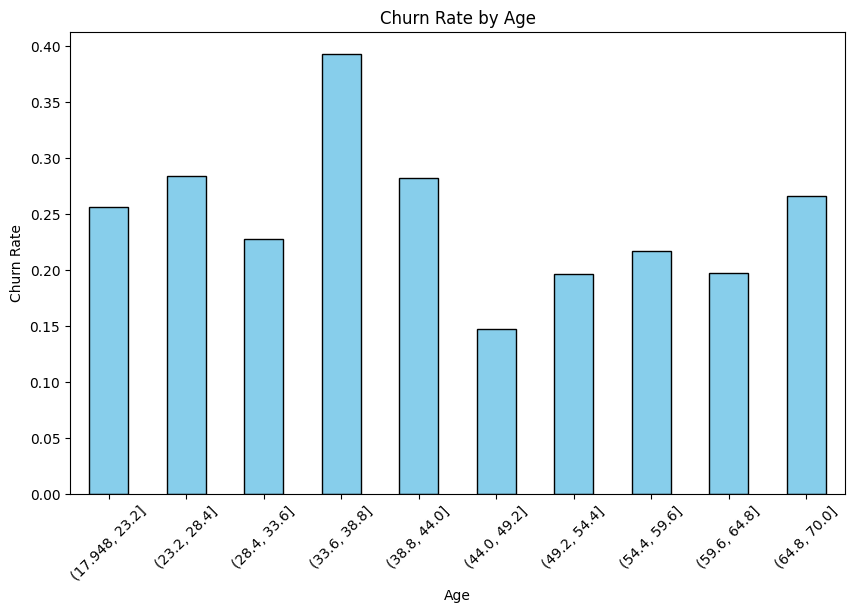

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_84246/1728822789.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df_clean.groupby(column)['Churned'].mean()


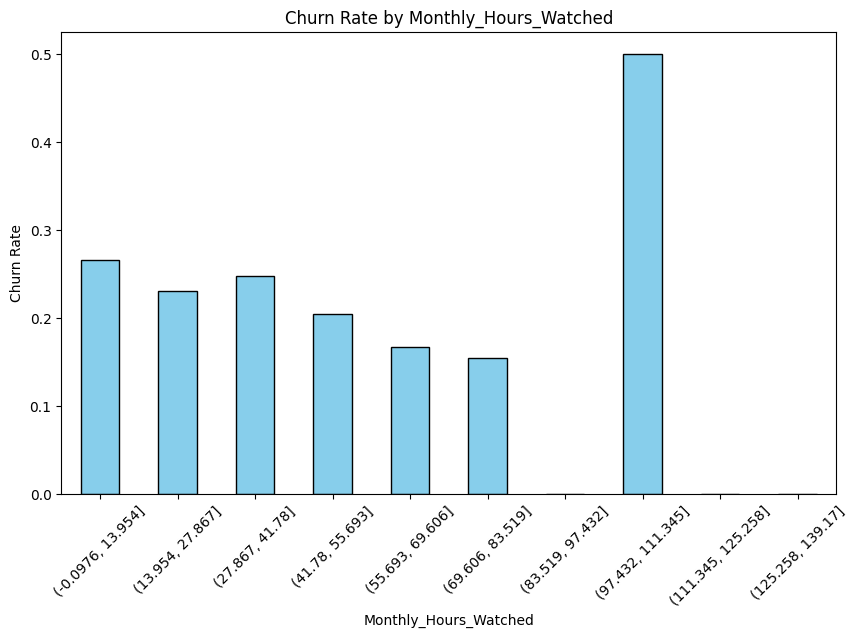

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_84246/1728822789.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df_clean.groupby(column)['Churned'].mean()


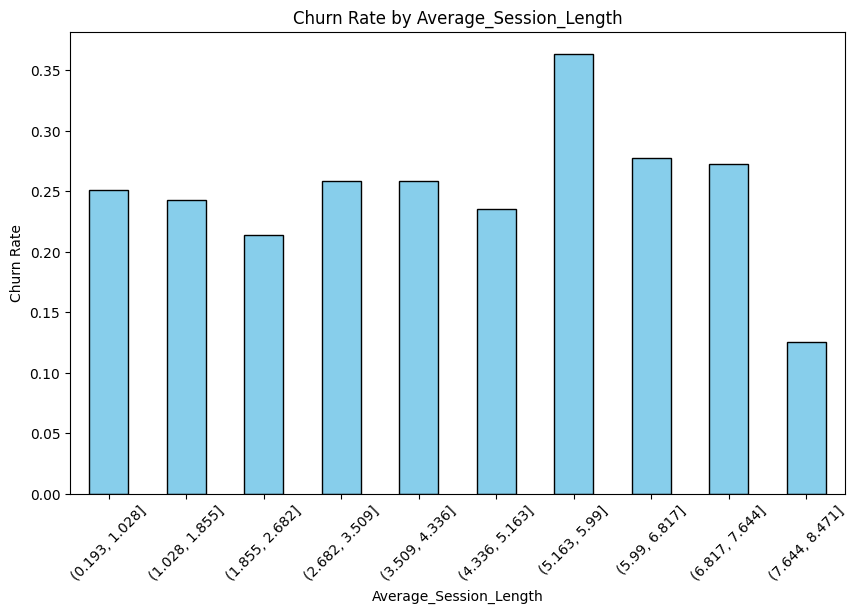

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_84246/1728822789.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df_clean.groupby(column)['Churned'].mean()


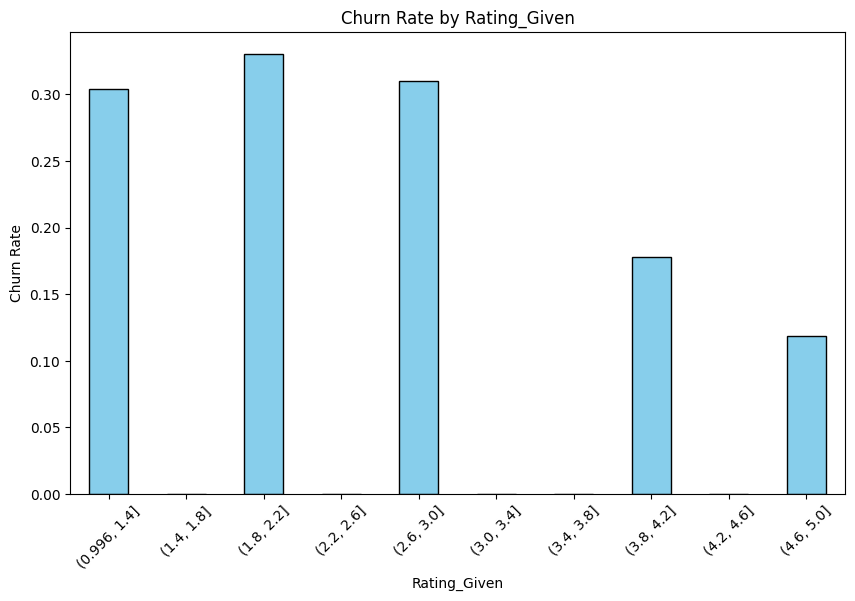

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_84246/1728822789.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df_clean.groupby(column)['Churned'].mean()


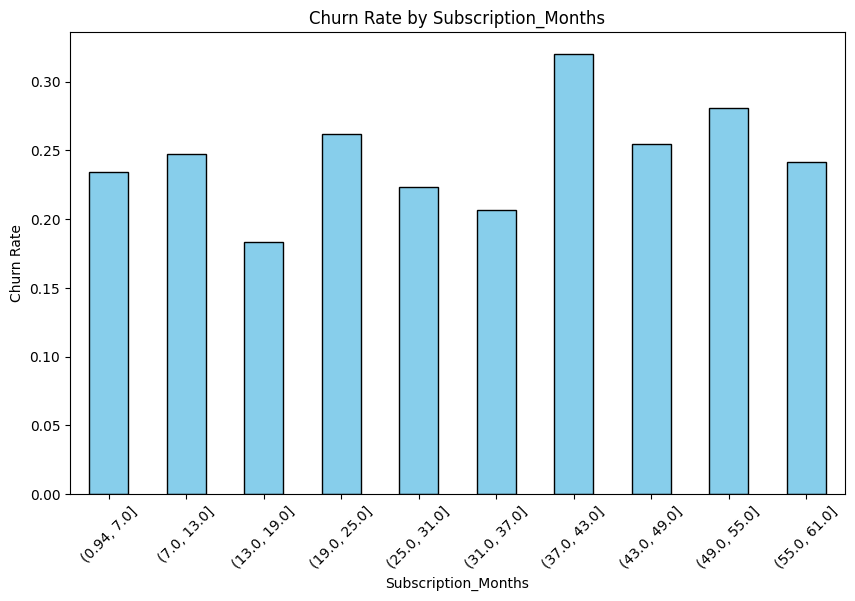

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_84246/1728822789.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df_clean.groupby(column)['Churned'].mean()


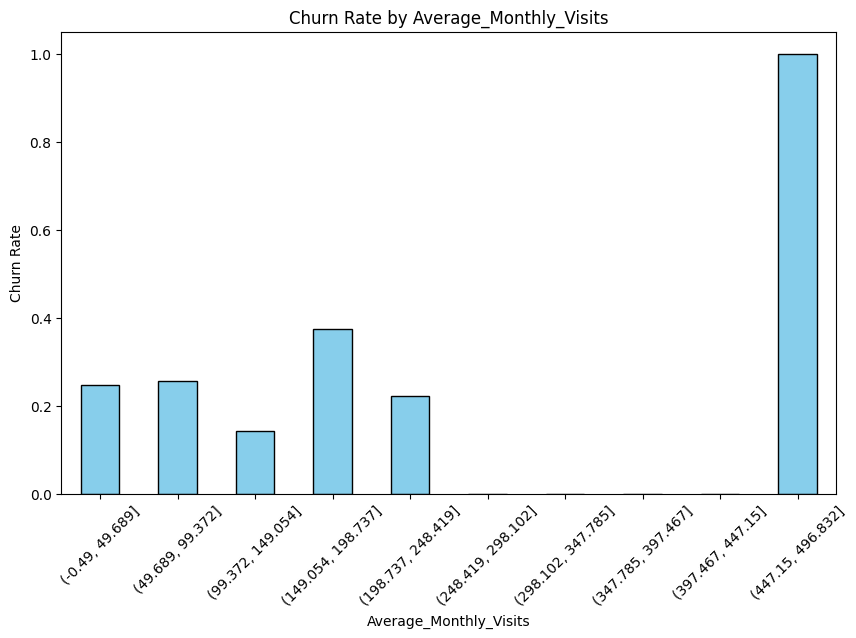

In [217]:
#Calculate the Churn rate of different variables
def plot_churn_rate(column):
    churn_rate = df_clean.groupby(column)['Churned'].mean()
    plt.figure(figsize=(10, 6))
    churn_rate.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Churn Rate by {column}')
    plt.xlabel(column)
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.show()

categorical_columns = ['Subscription_Type', 'Gender', 'Favorite_Genre', 'Location', 'Devices_Used']
numerical_columns = ['Age', 'Monthly_Hours_Watched', 'Average_Session_Length', 'Rating_Given', 'Subscription_Months', 'Average_Monthly_Visits']


for column in categorical_columns:
    plot_churn_rate(column)
    

for column in numerical_columns:
    df_clean[column] = pd.cut(df_clean[column], bins=10) 
    plot_churn_rate(column)

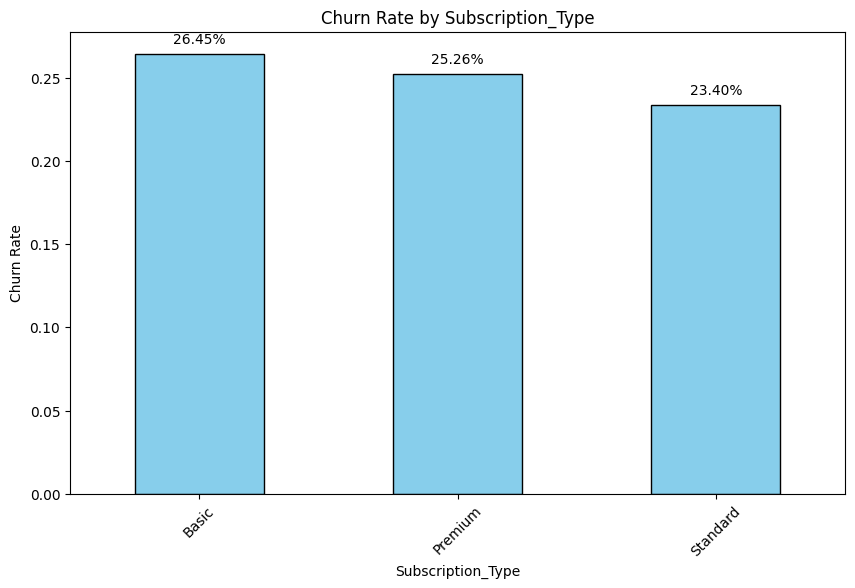

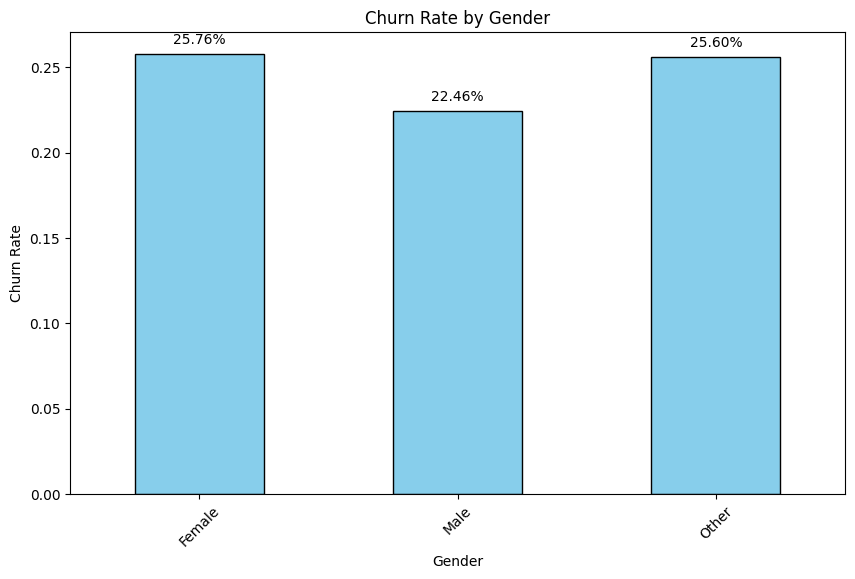

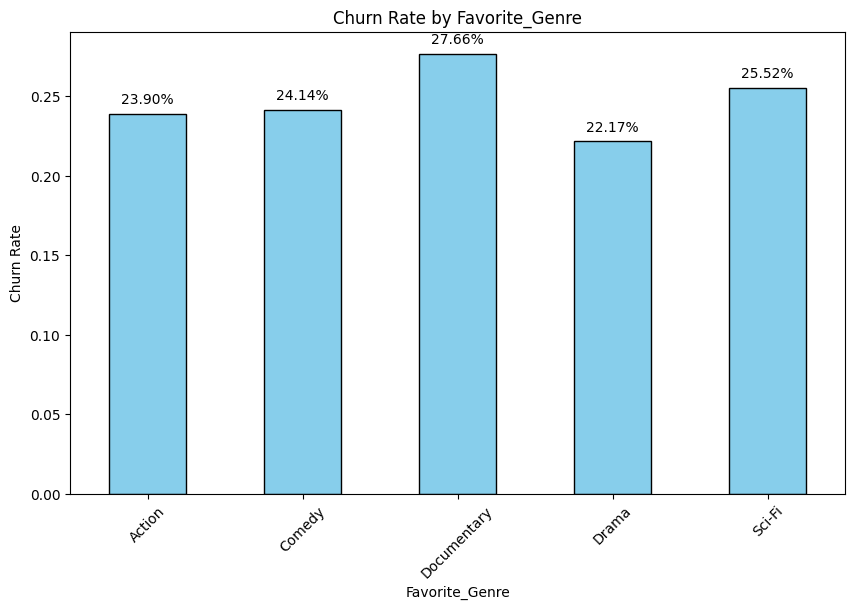

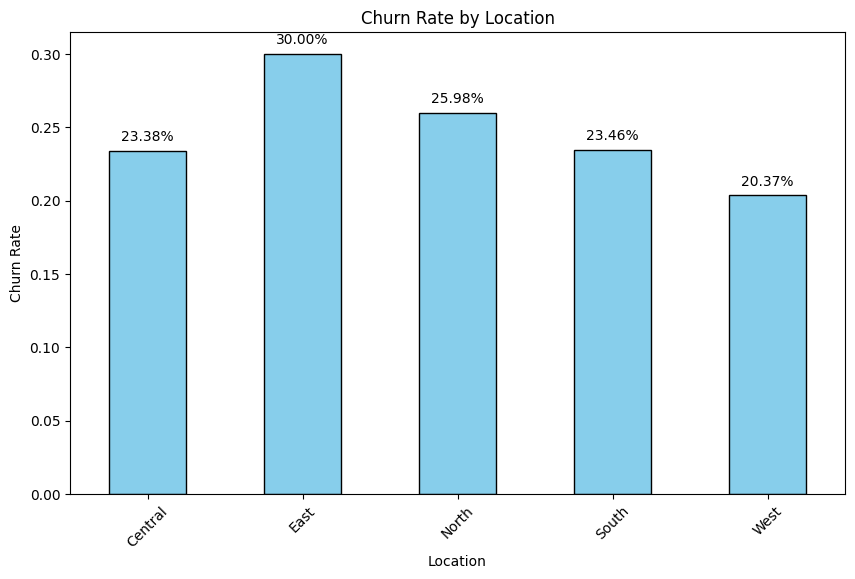

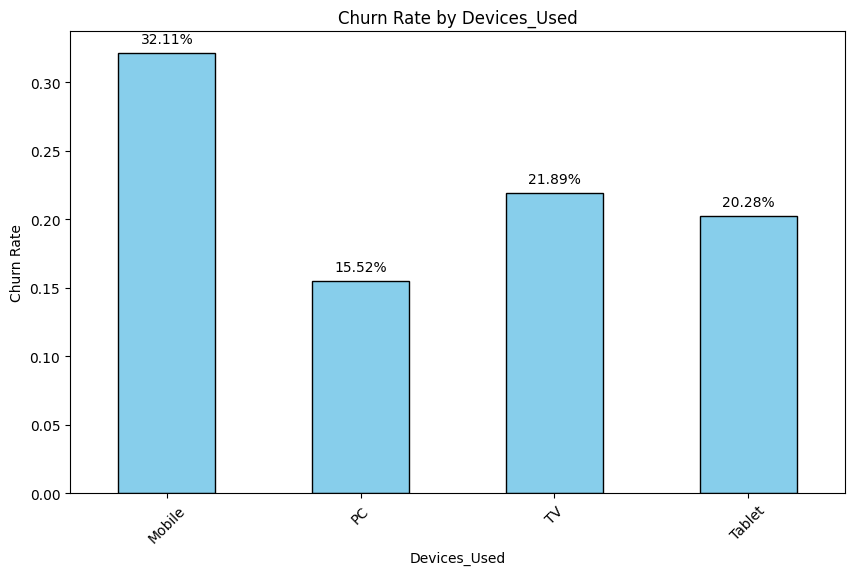

In [218]:
# Calculate the Churn rate for different variables and plot them on the graph
def plot_churn_rate(column):
    churn_rate = df_clean.groupby(column)['Churned'].mean()
    plt.figure(figsize=(10, 6))
    ax = churn_rate.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Churn Rate by {column}')
    plt.xlabel(column)
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.show()

categorical_columns = ['Subscription_Type', 'Gender', 'Favorite_Genre', 'Location', 'Devices_Used']

for column in categorical_columns:
    plot_churn_rate(column)

# Estimates the potential business impact

In [219]:
# From previous code
user_count = 1000
current_churn_rate = 0.246
new_churn_rate = 0.20
monthly_revenue_per_user = 14.99  # Assuming the monthly revenue per user is $14.99

churn_rate_reduction = current_churn_rate - new_churn_rate
reduced_churn_count = churn_rate_reduction * user_count
potential_revenue_retention_monthly = reduced_churn_count * monthly_revenue_per_user
potential_revenue_retention_annual = potential_revenue_retention_monthly * 12

# Current and new average subscription months
current_avg_subscription_months = 32
new_avg_subscription_months = 35

# Calculate the CLV
current_clv = current_avg_subscription_months * monthly_revenue_per_user
new_clv = new_avg_subscription_months * monthly_revenue_per_user

clv_increase_per_user = new_clv - current_clv
total_clv_increase = clv_increase_per_user * user_count

# Output the results
print(f'Current churn rate: {current_churn_rate:.2%}')
print(f'New churn rate: {new_churn_rate:.2%}')
print(f'Number of reduced churns: {reduced_churn_count:.0f} users')
print(f'Potential monthly revenue retention: ${potential_revenue_retention_monthly:.2f}')
print(f'Potential annual revenue retention: ${potential_revenue_retention_annual:.2f}')
print(f'Current CLV: ${current_clv:.2f}')
print(f'New CLV: ${new_clv:.2f}')
print(f'Increase in CLV per user: ${clv_increase_per_user:.2f}')
print(f'Total increase in CLV: ${total_clv_increase:.2f}')


Current churn rate: 24.60%
New churn rate: 20.00%
Number of reduced churns: 46 users
Potential monthly revenue retention: $689.54
Potential annual revenue retention: $8274.48
Current CLV: $479.68
New CLV: $524.65
Increase in CLV per user: $44.97
Total increase in CLV: $44970.00
